In [1]:
# IMPORTS

from GridClass import *

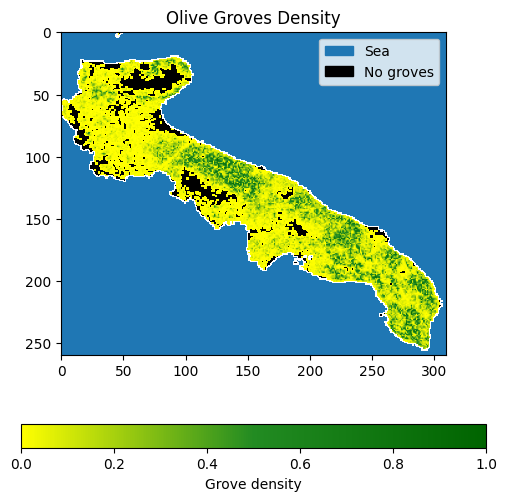

In [2]:
np.random.seed(100)

# GRID INSTANCE INITIALIZATION PARAMETERS
FROM_FILE = True
ROWS = 10 # Random grid
COLS = 10 # Random grid

# CREATE OLIVE GROVE DENSITY, FROM FILE OR RANDOMLY GENERATED
if FROM_FILE:
    file_path = "olivegrowthprop.mat"
    mat = sp.io.loadmat(file_path)
    GRID = Grid(density=mat["olivegrowthprop"])

else:
    GRID = Grid(shape=(ROWS, COLS))

# PLOT DISTRIBUTION OF OLIVE GROVES
GRID.plot_density(figsize=(6,6))

In [3]:
# SIMULATION PARAMETERS
# Control zone parameters
control = False
EZW = 0
BZW = 0
EZ_eff = 1
BZ_eff = 0.5

# Common parameters
A = 3 # 3 kp rate of local population growth
B = 14.069
a = 0 # relative carrying capacity in non olive plants
tol = 1e-8 # 1e-8 numerical noise tolerance (IF TOLERANCE IS TOO BIG, IT CAN HAPPEN THAT THE SIMULATION IS TRUNCATED AT THE FIRST ITERATION)

# Dispersal type
dispersal_type = "short_long" # short_long, levy_flight

# Short distance kernel
beta = 0.1
kernel_type = "exponential"

# Long distance kernel
disp_tol = 0.2 # 0.2 strattol stratified dispersal tolerance (threshold probability)
M_max = 5 # 5 maximum number of dispersers
D = 20 # 20 dispersal standard deviation

# Power law kernel (Levy flight)
d_min = 0.1
d_max = 20 # None
alpha = 7

# Define parameter dictionary (to be fed to .simulate())
parameters = {'control_zone': [control, EZW, BZW, EZ_eff, BZ_eff],
              'common': [A, B, a, tol],
              'dispersal': [dispersal_type],
              'short_long': [beta, kernel_type, disp_tol, M_max, D],
              'levy_flight': [d_min, d_max, alpha]}

In [4]:
# # RUN SIMULATION AND PLOT OUTCOME
# np.random.seed(5)
# timesteps = 4
# GRID.simulate(timesteps, parameters)
# # GRID.plot_incidence(risk=False, zoom=True, final=False, figsize=(6,6))
# # GRID.plot_incidence(risk=False, zoom=False, final=True, figsize=(6,6))

In [5]:
# # EVALUATE RISK AND PLOT
# np.random.seed(5)
# N = 20
# timesteps = 10
# GRID.evaluate_risk(N, timesteps, parameters, verbose=False)
# # GRID.plot_incidence(risk=True, zoom=True, final=False, figsize=(6,6))
# # GRID.plot_incidence(risk=True, zoom=False, final=True, figsize=(6,6))

In [6]:
# # PLOT DISTANCES OVER TIME
# np.random.seed(5)
# USE_RISK = True
# timesteps = 10
# N = 30

# avg_distance = np.zeros(timesteps+1)
# max_distance = avg_distance.copy()
# weighted_distance = avg_distance.copy() # distance weighted by incidence in cell

# if USE_RISK: GRID.evaluate_risk(N, timesteps, parameters)
# else:        GRID.simulate(timesteps, parameters)

# for t in range(timesteps+1):
#     if USE_RISK: infected_mask = GRID.risk[t] > 0
#     else:        infected_mask = GRID.incidence[t] > 0
#     infected_coordinates = np.argwhere(infected_mask)
#     distances = np.linalg.norm(infected_coordinates - GRID.seed, axis=1)
#     avg_distance[t] = np.mean(distances)
#     max_distance[t] = np.max(distances)
#     weights = GRID.incidence[t][infected_mask].flatten()
#     weighted_distance[t] = (distances * weights).sum() / weights.sum()

# intro_year = 2008
# years = intro_year + np.arange(timesteps+1)
# X = years.reshape(-1,1)
# y = avg_distance

# model = linear_model.LinearRegression()
# model.fit(X, y)

# y_pred = model.predict(X)
# coef = model.coef_[0]

# fig, ax = plt.subplots(figsize=(6,6))
# ax.plot(years, avg_distance, marker='o', linestyle='-', color='b', label='Average distance')
# ax.plot(years, y_pred, color='purple', linewidth=2, label=f'Spread rate = {np.round(coef,2)}km/year')
# ax.plot(years, max_distance, marker='o', linestyle='-', color='r', label='Maximum distance')
# ax.plot(years, weighted_distance, marker='o', linestyle='-', color='darkgreen', label='Weighted distance')
# ax.set_title('Distances from Gallipoli epicentre')
# ax.set_xlabel('Year')
# ax.set_xticks(years)
# ax.set_xticklabels(years, rotation=45)
# ax.set_ylabel('Distance (km)')
# ax.set_title('Distance from Epicentre Over Time')
# ax.grid(True)
# ax.legend()
# plt.tight_layout()
# plt.show()

In [7]:
# CALCULATE SPEED

np.random.seed(5)
N = 3
timesteps = 10
model = GRID.calculate_speed(timesteps, parameters, N=N, use_risk=True, weighted=True)
# print(model.summary())
print(model.params)
print(model.bse)

Simulating run 1 of 3...
Simulating run 2 of 3...
Simulating run 3 of 3...
[3.22486181]
[0.15731583]


# Sensitivity Analysis

In [8]:
# Global parameters
N = 3
timesteps = 10

In [12]:
# A: rate of local growth
np.random.seed(5)
A_list = [0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]
A_model_list = []

for i, A_trial in enumerate(A_list):
    print(f'Parameter {i+1}/{len(A_list)}: A = {A_trial}')
    parameters = {'control_zone': [control, EZW, BZW, EZ_eff, BZ_eff],
                'common': [A_trial, B, a, tol],
                'dispersal': [dispersal_type],
                'short_long': [beta, kernel_type, disp_tol, M_max, D],
                'levy_flight': [d_min, d_max, alpha]}
    A_model_list.append(GRID.calculate_speed(timesteps, parameters, N=N, use_risk=True, weighted=True, verbose=False))

Parameter 1/10: A = 0.5
Parameter 2/10: A = 1
Parameter 3/10: A = 1.5
Parameter 4/10: A = 2
Parameter 5/10: A = 2.5
Parameter 6/10: A = 3
Parameter 7/10: A = 3.5
Parameter 8/10: A = 4
Parameter 9/10: A = 4.5
Parameter 10/10: A = 5


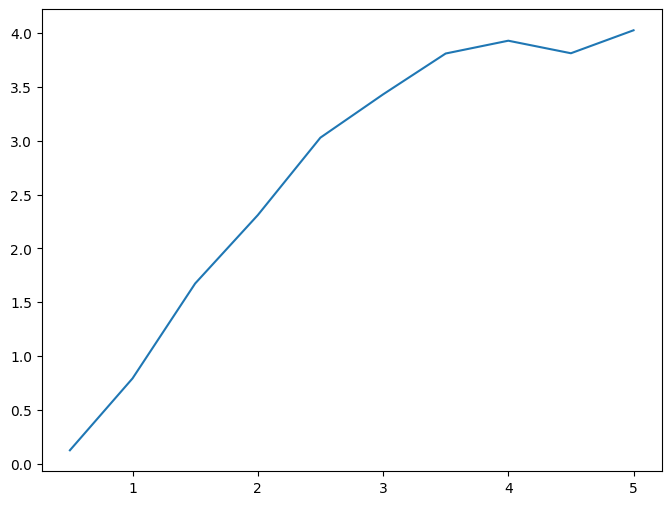

In [14]:
speed_list = [model.params for model in A_model_list]
err_list = [model.bse for model in A_model_list]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(A_list, speed_list)
plt.show()

In [15]:
# B: rate of local growth
np.random.seed(5)
A = 3
B_list = [10, 11, 12, 13, 14, 15, 16, 17, 18]
B_model_list = []

for i, B_trial in enumerate(B_list):
    print(f'Parameter {i+1}/{len(B_list)}: B = {B_trial}')
    parameters = {'control_zone': [control, EZW, BZW, EZ_eff, BZ_eff],
                'common': [A, B_trial, a, tol],
                'dispersal': [dispersal_type],
                'short_long': [beta, kernel_type, disp_tol, M_max, D],
                'levy_flight': [d_min, d_max, alpha]}
    B_model_list.append(GRID.calculate_speed(timesteps, parameters, N=N, use_risk=True, weighted=True, verbose=False))

Parameter 1/9: A = 10
Parameter 2/9: A = 11
Parameter 3/9: A = 12
Parameter 4/9: A = 13
Parameter 5/9: A = 14
Parameter 6/9: A = 15
Parameter 7/9: A = 16
Parameter 8/9: A = 17
Parameter 9/9: A = 18


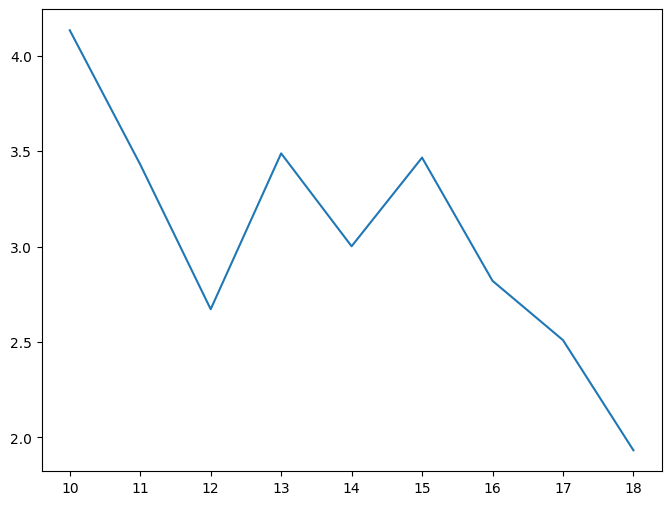

In [16]:
speed_list = [model.params for model in B_model_list]
err_list = [model.bse for model in B_model_list]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(B_list, speed_list)
plt.show()

In [19]:
# D: long-range dispersal 
np.random.seed(5)
D_list = 2.5 + 2.5 * np.arange(15)
D_model_list = []

for i, D_trial in enumerate(D_list):
    print(f'Parameter {i+1}/{len(D_list)}: D = {D_trial}')
    parameters = {'control_zone': [control, EZW, BZW, EZ_eff, BZ_eff],
                'common': [A, B, a, tol],
                'dispersal': [dispersal_type],
                'short_long': [beta, kernel_type, disp_tol, M_max, D_trial],
                'levy_flight': [d_min, d_max, alpha]}
    D_model_list.append(GRID.calculate_speed(timesteps, parameters, N=N, use_risk=True, weighted=True, verbose=False))

Parameter 1/15: D = 2.5
Parameter 2/15: D = 5.0
Parameter 3/15: D = 7.5
Parameter 4/15: D = 10.0
Parameter 5/15: D = 12.5
Parameter 6/15: D = 15.0
Parameter 7/15: D = 17.5
Parameter 8/15: D = 20.0
Parameter 9/15: D = 22.5
Parameter 10/15: D = 25.0
Parameter 11/15: D = 27.5
Parameter 12/15: D = 30.0
Parameter 13/15: D = 32.5
Parameter 14/15: D = 35.0
Parameter 15/15: D = 37.5


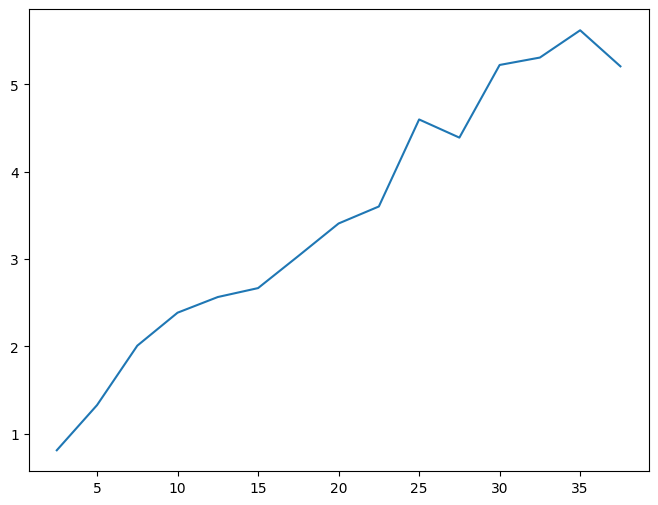

In [20]:
speed_list = [model.params for model in D_model_list]
err_list = [model.bse for model in D_model_list]

fig, ax = plt.subplots(figsize=(8,6))
ax.plot(D_list, speed_list)
plt.show()

In [ ]:
# beta_list
# disp_tol_list = 
M_max_list = [4, 5, 6, 7, 8] 
D_list = [10, 20, 30]

speed_list = []
for D in D_list:
    for M_max in M_max_list:
        parameters = {'control_zone': [control, EZW, BZW, EZ_eff, BZ_eff],
                    'common': [A, B, a, tol],
                    'dispersal': [dispersal_type],
                    'short_long': [beta, kernel_type, disp_tol, M_max, D],
                    'levy_flight': [d_min, d_max, alpha]}
        print(f'D={D}, M_max={M_max}')
        speed_list.append(GRID.calculate_speed(timesteps, parameters, N=N, use_risk=True, weighted=True))

print(speed_list)

In [ ]:
import numpy as np
from scipy.optimize import least_squares

# Observed speed of disease spread (example data)
observed_speed = 9.75 # 17.8
timesteps = 10

def residuals(params):
    A, B, beta, D = params
    parameters = {'control_zone': [control, EZW, BZW, EZ_eff, BZ_eff],
                  'common': [A, B, a, tol],
                  'dispersal': [dispersal_type],
                  'short_long': [beta, kernel_type, disp_tol, M_max, D],
                  'levy_flight': [d_min, d_max, alpha]}
    predicted_speed = calculate_speed(GRID, timesteps, parameters, use_risk=False)
    return observed_speed - predicted_speed

# Initial guess for the parameters
initial_guess = np.array([3, 14.069, 0.1, 20])

# Run the least squares optimization
result = least_squares(residuals, initial_guess)#, bounds=(0, np.inf))

# Output the optimal parameters
optimal_params = result.x
print("Optimal Parameters:", optimal_params)


In [ ]:
# CALCULATE SPEED OF SPREAD FROM AVERAGE DISTANCE
# 2013-2023: 9.75 km/year
# 2013-2016: 17.8 km/year

# Define a function from which calculating least squares. 
# Can do a grid search or through a "smarter" search



In [ ]:
# # EVALUATE RISK

# N = 5
# timesteps = 10
# GRID.evaluate_risk(N, timesteps, parameters)

In [ ]:
# # PLOT RISK AT DIFFERENT TIMES

# im_sea = np.ma.array(GRID.density, mask=~GRID.sea_mask)

# ncols = 5
# images = []
# fig, ax = plt.subplots(1, ncols, figsize=(ncols*4,4))
# for i in range(ncols):
#     images.append(ax[i].imshow(GRID.risk[1+2*i], cmap="inferno", interpolation=None, norm=colors.Normalize(vmin=0, vmax=1)))
#     ax[i].imshow(im_sea, cmap=colors.ListedColormap(['tab:blue']), interpolation=None)
#     ax[i].set_title(f"{1+2*i}-year risk")
# cbar = fig.colorbar(images[0], ax=ax, orientation="horizontal")
# cbar.set_label("Risk")

# plt.show()

In [ ]:
# # EVALUATE RISK (AVERAGE INCIDENCE) OVER GRID TIMESERIES
# # Short_long kernel with and without Control Zone

# average = np.zeros(GRID.timesteps+1)

# for t in range(GRID.timesteps+1):
#     average[t] = GRID.risk[t][GRID.grove_mask].mean()
    
# plt.plot(np.arange(GRID.timesteps+1), average)
# plt.show()

In [ ]:
# PERCENTAGE OF GROVES THAT ARE INFECTED (ASSUMING 1 GROVE=1 GRID CELL)
# The Gompertz growth model grows very quickly even extremely small numbers.
# One year (one iteration) is typically enough to have a sizable value for I (incidence)
# So I will coansider as infected, all those groves above the tolerance value 'tol'

percentage_of_groves = np.zeros(GRID.incidence.shape[0])

for t in range(GRID.timesteps+1):
    percentage_of_groves[t] = len(GRID.incidence[t][GRID.incidence[t] > tol]) / len(GRID.grove_mask.flatten())

plt.plot(np.arange(GRID.timesteps+1), percentage_of_groves)

plt.show()

In [ ]:
N = 2
timesteps = 5

# GRID.simulate(timesteps, parameters)
GRID.evaluate_risk(N, timesteps, parameters)

# print(GRID.incidence.shape)
print(GRID.risk.shape)

In [ ]:
# RUN SIMULATION FOR DIFFERENT PARAMETERS

N = 10
timesteps = 10
EZW_list = [10, 20, 30]
percentage_of_groves = np.zeros((len(EZW_list), GRID.timesteps+1))
# print(percentage_of_groves.shape)

for i, EZW in enumerate(EZW_list):
    parameters = {'control_zone': [control, EZW, BZW, BZ_eff],
                  'common': [A, B, a, tol],
                  'dispersal': [dispersal_type],
                  'short_long': [beta, kernel_type, disp_tol, M_max, D],
                  'levy_flight': [n_vectors, d_min, d_max, alpha, sample]}

    # GRID.simulate(timesteps, parameters)
    GRID.evaluate_risk(N, timesteps, parameters)
    # GRID.plot_density(figsize=(6,6))
    # GRID.plot_final_incidence(figsize=(6,6))

    for t in range(GRID.timesteps+1):
        # percentage_of_groves[i,t] = len(GRID.incidence[t][GRID.incidence[t] > tol]) / len(GRID.grove_mask.flatten())
        percentage_of_groves[i,t] = len(GRID.risk[t][GRID.risk[t] > tol]) / len(GRID.grove_mask.flatten())


In [ ]:
# PLOT PERCENTAGE OF INFECTED GROVES FOR DIFFERENT PARAMETER VALUES

for i, EZW in enumerate(EZW_list):
    plt.plot(np.arange(GRID.timesteps+1), percentage_of_groves[i], label=f'EZW={EZW}')

plt.legend(loc='upper right')
plt.title(f"Percentage of infected groves (from {timesteps}-year risk) for different values of EZW")
plt.show()

In [ ]:
# First interesting result: the size of the control zone determines a delay in the epidemic spread
# Explore different values for EZW and BZW
# Calculate time delay from simulation
# The increase in average incidence and percentage of infected groves increases linearly with time
# This reflects a constant speed for the infection front

# Differences in this regard between short_long and levy_flight. Levy_flight needs more time to 
# resume same pace (?): verify.  

In [ ]:
# INCLUDE VECTOR POPULATION DYNAMICS

In [ ]:
# EVALUATE SPEED OF EPIDEMIC SPREAD 

# Get the centroid of each grid cell. 
# Create distance classes:
# - 1 km radius around centroid of seed cell (includes all cells whose centroid is within the radius)
# - 1 km wide concentric rings around centroid of seed cell (same) 

In [ ]:
# add "scale" parameter for rescaling of random samples; resolved by simply modifying alpha exponent parameter


In [ ]:
# x = 280
# y = 230
# # print(np.mean(data))

# # plt.hist(data, bins=10)

# binwidth = 0.1

# for t in range(timesteps+1):
#     # flattened_data = GRID.I[t][GRID.I[t] > 0].flatten()
#     # flattened_data = GRID.incidence[t][(GRID.incidence[t] > 0.3) & (GRID.incidence[t] < 0.8)].flatten()
#     data = GRID.all_incidences[:,t,y,x]
#     (n, bins, patches) = plt.hist(data, bins=np.arange(0, 1 + binwidth, binwidth))
#     plt.xlim(0,1 + binwidth)
#     plt.show()
#     print(n)



In [ ]:
# def calculate_speed(grid, timesteps, parameters, N=None, use_risk=False, weighted=False):
#     avg_distance = np.zeros(timesteps+1)
#     max_distance = avg_distance.copy()
#     if weighted:
#         weighted_distance = avg_distance.copy() # distance weighted by incidence in cell

#     if use_risk: grid.evaluate_risk(N, timesteps, parameters)
#     else:        grid.simulate(timesteps, parameters)

#     for t in range(timesteps+1):
#         if use_risk: infected_mask = grid.risk[t] > 0
#         else:        infected_mask = grid.incidence[t] > 0
#         infected_coordinates = np.argwhere(infected_mask)
#         distances = np.linalg.norm(infected_coordinates - grid.seed, axis=1)
#         avg_distance[t] = np.mean(distances)
#         max_distance[t] = np.max(distances)
#         if weighted:
#             weights = grid.incidence[t][infected_mask].flatten()
#             weighted_distance[t] = (distances * weights).sum() / weights.sum()

#     X = np.arange(timesteps+1)
#     y = weighted_distance

#     # model = linear_model.LinearRegression(fit_intercept=False)
#     # model.fit(X.reshape(-1,1), y, )

#     ols = sm.OLS(y, X)
#     model = ols.fit()

#     return model

# np.random.seed(5)

# N = 3
# timesteps = 10
# model = calculate_speed(GRID, timesteps, parameters, N=N, use_risk=True, weighted=True)